<a href="https://colab.research.google.com/github/nimarta-devi/Fruit_Calories_Estimation/blob/main/Fruit_calories_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
# Load the h5 model
model = tf.keras.models.load_model('fruits_model.h5')

In [5]:
class_names = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana',
 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn',
 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White',
 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green',
 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry',
 'Strawberry', 'Tomato', 'Watermelon']


In [6]:
len(class_names)

33

In [7]:
density_dict = {
    0: 0.6,    # Apple Braeburn
    1: 0.58,   # Apple Granny Smith
    2: 0.48,   # Apricot
    3: 0.9,    # Avocado
    4: 0.92,   # Banana
    5: 0.94,   # Blueberry
    6: 0.5,    # Cactus fruit
    7: 0.36,   # Cantaloupe
    8: 0.97,   # Cherry
    9: 0.81,   # Clementine
    10: 0.62,  # Corn
    11: 0.97,  # Cucumber Ripe
    12: 0.69,  # Grape Blue
    13: 0.79,  # Kiwi
    14: 0.97,  # Lemon
    15: 0.96,  # Limes
    16: 0.8,   # Mango
    17: 0.66,  # Onion White
    18: 0.85,  # Orange
    19: 0.9,   # Papaya
    20: 0.93,  # Passion Fruit
    21: 0.67,  # Peach
    22: 0.89,  # Pear
    23: 0.92,  # Pepper Green
    24: 0.88,  # Pepper Red
    25: 0.85,  # Pineapple
    26: 0.94,  # Plum
    27: 0.75,  # Pomegranate
    28: 0.77,  # Potato Red
    29: 0.95,  # Raspberry
    30: 0.92,  # Strawberry
    31: 0.93,  # Tomato
    32: 0.9    # Watermelon
}

In [8]:
calories_dict = {
    0: 52,   # Apple Braeburn
    1: 55,   # Apple Granny Smith
    2: 48,   # Apricot
    3: 160,  # Avocado
    4: 96,   # Banana
    5: 57,   # Blueberry
    6: 36,   # Cactus fruit
    7: 34,   # Cantaloupe
    8: 50,   # Cherry
    9: 35,   # Clementine
    10: 86,  # Corn
    11: 15,  # Cucumber Ripe
    12: 57,  # Grape Blue
    13: 41,  # Kiwi
    14: 29,  # Lemon
    15: 29,  # Limes
    16: 60,  # Mango
    17: 40,  # Onion White
    18: 43,  # Orange
    19: 43,  # Papaya
    20: 97,  # Passion Fruit
    21: 39,  # Peach
    22: 57,  # Pear
    23: 20,  # Pepper Green
    24: 31,  # Pepper Red
    25: 50,  # Pineapple
    26: 46,  # Plum
     27: 83,  # Pomegranate
    28: 77,  # Potato Red
    29: 53,  # Raspberry
    30: 32,  # Strawberry
    31: 18,  # Tomato
    32: 30   # Watermelon
}


In [9]:
def preprocess_image(image_path):
    # Load and preprocess the input image
  input_image = Image.open(image_path)
  input_image = input_image.resize((100, 100))  # Resize to match the model's input shape
  input_image = np.array(input_image)  # Convert to numpy array
  input_image = input_image / 255.0  # Normalize pixel values between 0 and 1

  # Expand dimensions to match the expected input shape of the model
  preprocessed_image = np.expand_dims(input_image, axis=0)
  return preprocessed_image


In [10]:
# Define a function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))  # Resize the image to match the model's input size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = img.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Define a function to calculate the calories in the image
def calculate_calories(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    fruit_class = class_names[class_index]
    density = density_dict[class_index]
    calorie = calories_dict[class_index]
    return fruit_class, calorie * density

1/1 [==============================] - 0s 355ms/step
The estimated calories in the image (Blueberry): 53.58


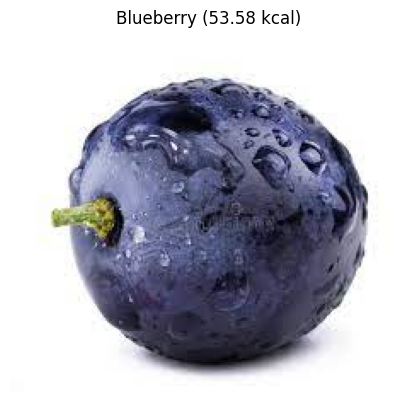

In [11]:
import cv2

# Call the calculate_calories function with the path to the image
image_path = 'grape.jpg'
fruit_name, calories = calculate_calories(image_path)
print(f"The estimated calories in the image ({fruit_name}): {calories}")

# Display the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('{} ({} kcal)'.format(fruit_name, calories))
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 84ms/step
The estimated calories in the image (Banana): 88.32000000000001


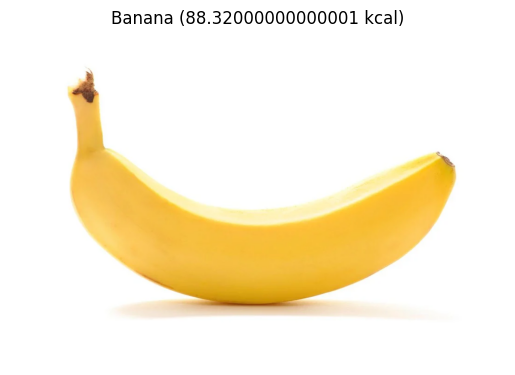

In [15]:
import cv2

# Call the calculate_calories function with the path to the image
image_path = 'banana.png'
fruit_name, calories = calculate_calories(image_path)
print(f"The estimated calories in the image ({fruit_name}): {calories}")

# Display the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('{} ({} kcal)'.format(fruit_name, calories))
plt.axis('off')
plt.show()